# Skript: Datenvisualisierung Python

### Scatterplot, Barplot, Lineplot

---


In [29]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import xlabel, ylabel, title

In [2]:
# Heutige Datensätze:
taxis = sns.load_dataset('taxis')
flights = sns.load_dataset('flights')

In [3]:
# Anschauen:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
# Anschauen:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# 0. Plot-Stil

---

Mit `sns.set_style()` können wir einen generellen Plot-Stil für alle Plots des Notebooks einstellen.

Verfügbare Styles: `white`, `whitegrid`, `dark`, `darkgrid` und `ticks`

[Übersicht](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/104-seaborn-themes.ipynb)

Es können auch eigene Styles definiert werden, sowie ein 'Kontext' und eine Standard-Farbpalette festgelegt werden. Dazu später mehr.

In [5]:
# Für den Rest des Notebooks festlegen:
sns.set_style('whitegrid')

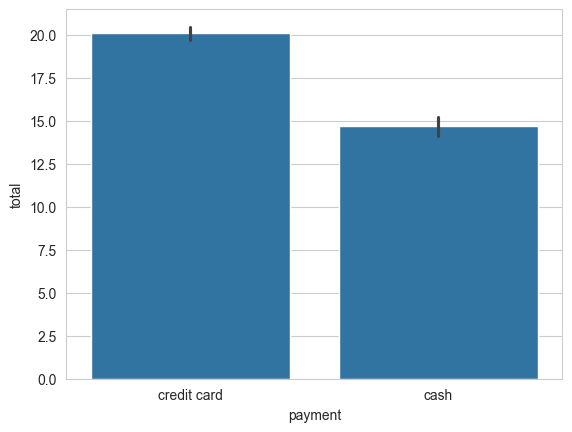

In [8]:
# Beispielplot:
sns.barplot(
	taxis,
	x='payment',
	y='total',
	# errorbar=None,
);
# Quizfrage: Was bedeuten eigentlich die Balkenhöhe/ was zeigen sie an?
# Und wofür stehen die schwarzen Striche?
# ...

In [9]:
# Anzahl Spalten:
taxis.shape[0]

6433

In [10]:
# Anzahl Bezahlarten:
taxis['payment'].value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

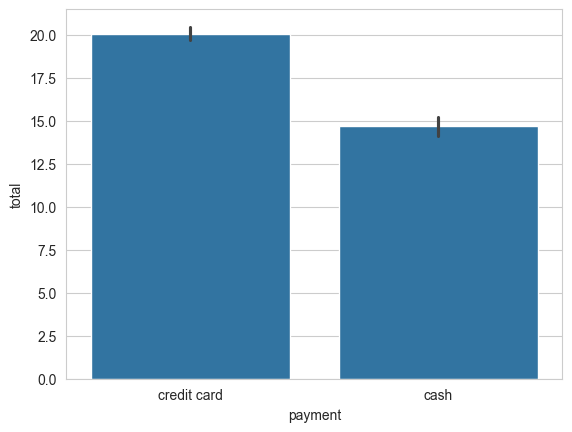

In [11]:
# Standardplot hat mean als Schätzer (estimator):
sns.barplot(
	taxis,
	x='payment',
	y='total',
	estimator='mean',
);
# Es gibt andere Schätzer wie median, std, sum

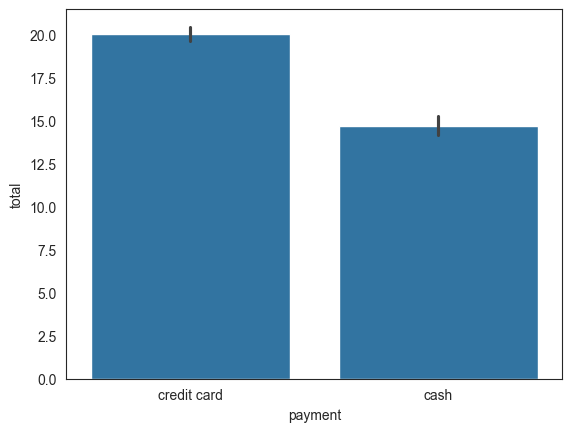

In [12]:
# Mit Kontext-Manager Stil nur für einen Plot festlegen:
with sns.axes_style('white'):
	sns.barplot(taxis, x='payment', y='total')

# 1. Balkendiagramme / Säulendiagramme / Barplots

---

Säulendiagramme eignen sich, um **Vergleiche zwischen Kategorien** zu visualisieren.

Sind es wenige (< 15) Kategorien, ist ein Säulendiagramm (vertikale Ausrichtung) übersichtlicher.
<br> Sind es viele (>= 15) Kategorien, ist ein Balkendiagramm (horizontale Ausrichtung) übersichtlicher.

In [13]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


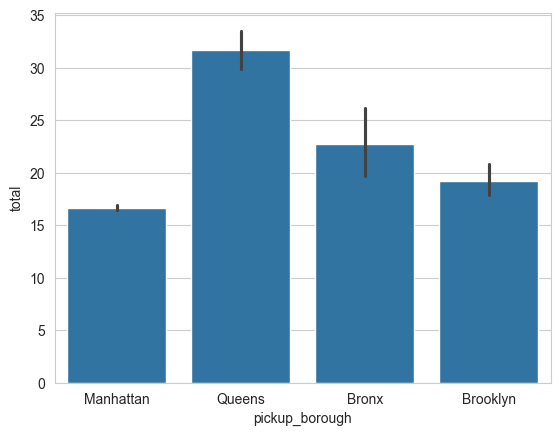

In [14]:
# Einfaches Säulendiagramm mit Konfidenzintervallen:
sns.barplot(taxis, x='pickup_borough', y='total');

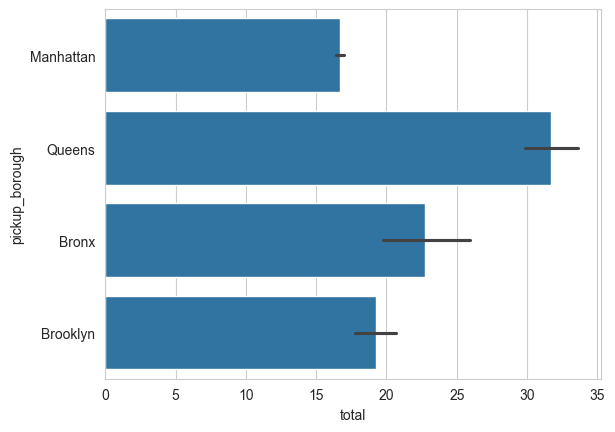

In [15]:
# Einfaches Balkendiagramm mit Konfidenzintervallen:
sns.barplot(taxis, y='pickup_borough', x='total');

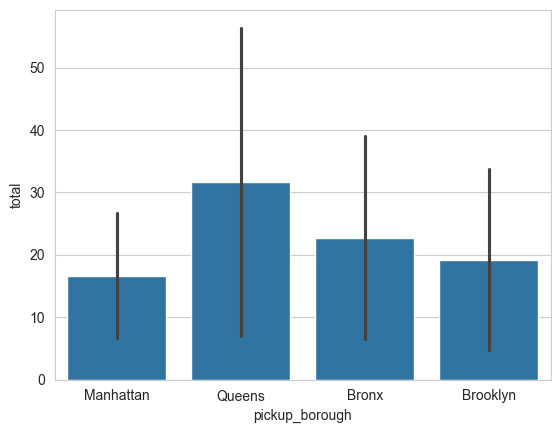

In [16]:
# Einfacher Barplot mit anderen Fehlerbalken
sns.barplot(taxis,
			x='pickup_borough',
			y='total',
			errorbar='sd');

# ci = Konfidenzintervall
# pi = Prediction Interval / Vorhersageintervall
# se = Standard Error of the Mean / Standardfehler des Mittelwertes
# sd = Standardabweichung

## Weitere Dimensionen darstellen

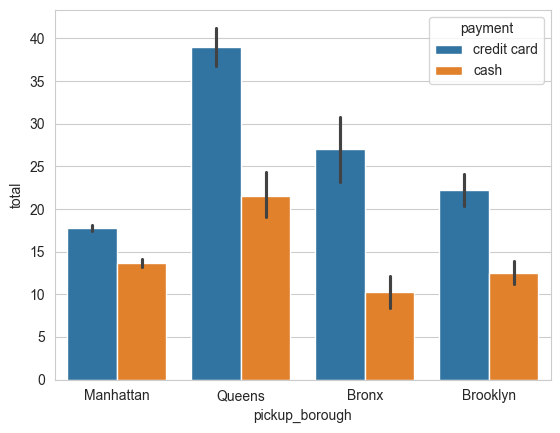

In [17]:
# Gruppierter Barplot
sns.barplot(
	taxis,
	x='pickup_borough',
	y='total',
	hue='payment',
);

In [18]:
# Gestapeltes Säulendiagram - am einfachsten mit Pandas möglich:
df_pivot = taxis.pivot_table(
	index='pickup_borough',
	columns='payment',
	values='total',
	aggfunc='sum'
);

In [19]:
df_pivot

payment,cash,credit card
pickup_borough,,
Bronx,256.30,1997.46
Brooklyn,1493.45,5791.43
Manhattan,19076.13,68305.24
Queens,5735.57,14931.96


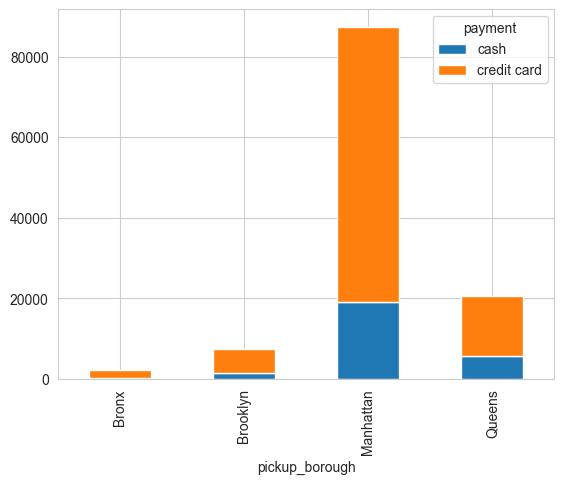

In [20]:
df_pivot.plot(kind='bar', stacked=True);

## Stilisierung von Barplots

Viele Aspekte eines Diagramms können über Schlüsselwörter im Funktionsaufruf verändert werden.

Oft verwendete Wörter:

* `color`: Farbe
* `edgecolor / ec`: Randlinienfarbe
* `facecolor`: Füllfarbe
* `palette`: Farbpalette
* `linewidth` / `lw`: Randliniendicke
* `errcolor`: Farbe Fehlerbalken
* `capsize`: Länge der "Kappe" des Fehlers

Achsenbezogene Einstellungen müssen in der Regel am Achsen-Objekt, nicht im Plotaufruf eingestellt werden.

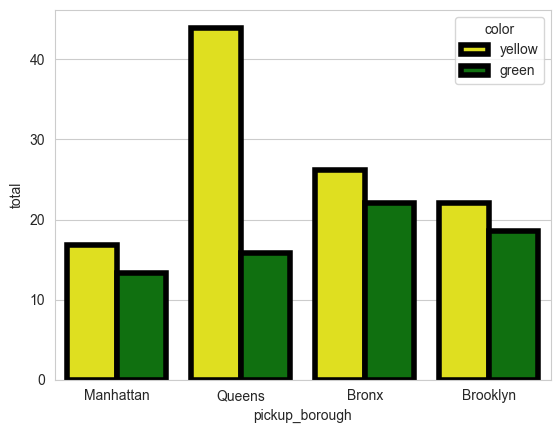

In [24]:
# Gruppierter Barplot:
sns.barplot(
	taxis,
	x='pickup_borough',
	y='total',
	palette={'yellow': 'yellow', 'green': 'green'},
	# Keys=Labels, Values=Farbtöne
	hue='color',
	ec='black',
	lw=4,
	errorbar=None
);

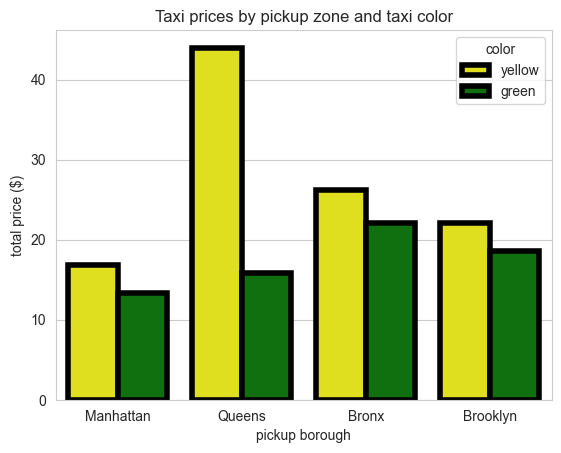

In [25]:
# Anpassung möglich, wenn Plot in Variabel gespeichert wird (mehr am Donnerstag):
ax = sns.barplot(
	taxis,
	x='pickup_borough',
	y='total',
	palette={'yellow': 'yellow', 'green': 'green'},
	# Keys=Labels, Values=Farbtöne
	hue='color',
	ec='black',
	lw=4,
	errorbar=None,
)

ax.set(
	ylabel='total price ($)',
	xlabel='pickup borough',
	title='Taxi prices by pickup zone and taxi color',
);

## Übungsaufgabe Barplot

Lade den 'penguins'-Datensatz und bilde den hier gezeigten Barplot nach!

![image.png](1_penguins_barplot.png)

Weitere Infos zum Anpassen von Diagrammen findest du hier:

* https://matplotlib.org/stable/gallery/color/named_colors.html
* https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
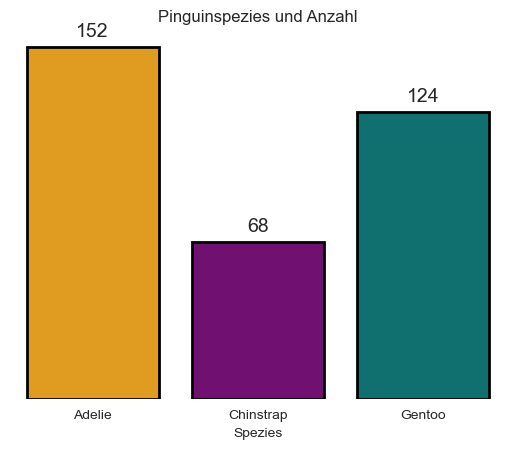
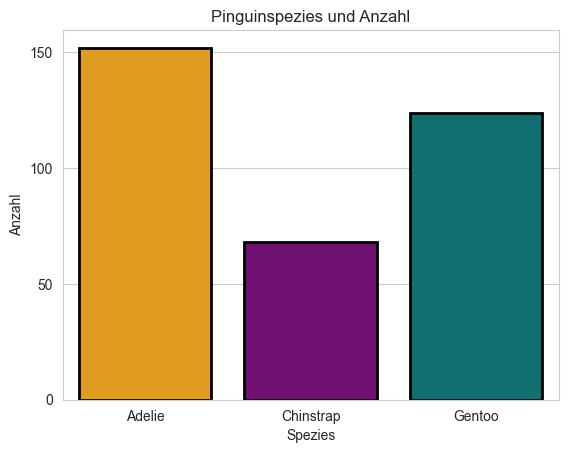

In [23]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [59]:
species = penguins["species"].value_counts()
species = pd.DataFrame(species)
species = species.sort_values(by="species")
species

,count
species,
Adelie,152
Chinstrap,68
Gentoo,124


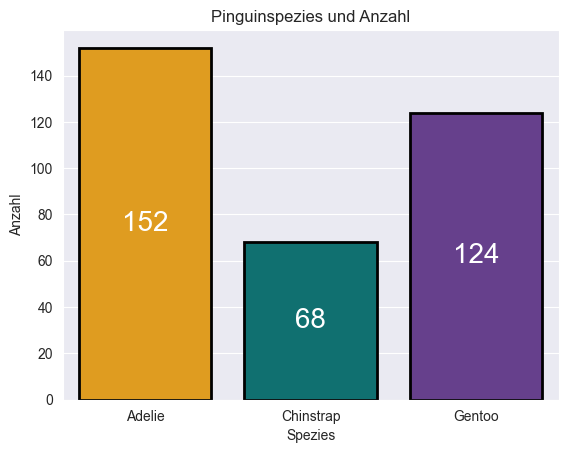

In [102]:
# color theme
sns.set_style('darkgrid')

# bar plot, params
pengu_plot = sns.barplot(
	species,
	x='species',
	y='count',
	palette={'Adelie': 'orange', 'Chinstrap': 'teal', 'Gentoo': 'rebeccapurple'},
	hue='species',
	ec='black',
	lw=2,
);

# labels, title
pengu_plot.set(
	xlabel='Spezies',
	ylabel='Anzahl',
	title='Pinguinspezies und Anzahl',
);

# bar labels
pengu_plot.bar_label(pengu_plot.containers[0], label_type="center", fontsize=20, color="white")
pengu_plot.bar_label(pengu_plot.containers[1], label_type="center", fontsize=20, color="white")
pengu_plot.bar_label(pengu_plot.containers[2], label_type="center", fontsize=20, color="white");

## 2. Lineplot


---

Lineplots eignen sich, um **Veränderungen über Zeit** darzustellen. Eine Linie sollte dabei eine einzige fortlaufende Zeitreihe darstellen. Wenn mehrere Zeitreihen (z.B. Veränderung über Zeit in mehreren Ländern) dargestellt werden, sollten mehrere Linien verwendet werden. 

In [103]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


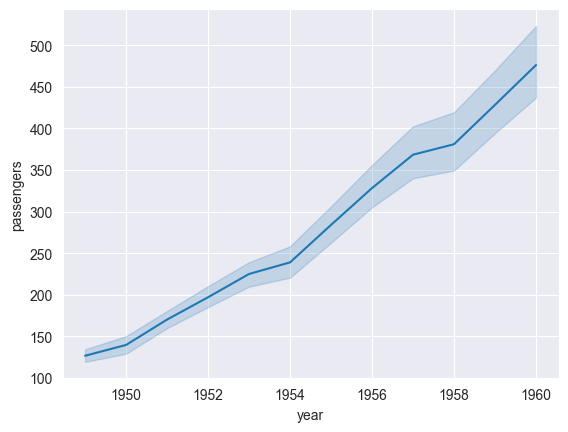

In [104]:
# Einfacher Lineplot
# Frage: Was sehen wir um die Linie?
sns.lineplot(flights, x='year', y='passengers');

In [ ]:
# Warum es breiter wird:

In [105]:
print(flights[flights.year == 1960].passengers.min())
print(flights[flights.year == 1960].passengers.max())

390
622


In [106]:
print(flights[flights.year == 1950].passengers.min())
print(flights[flights.year == 1950].passengers.max())

114
170


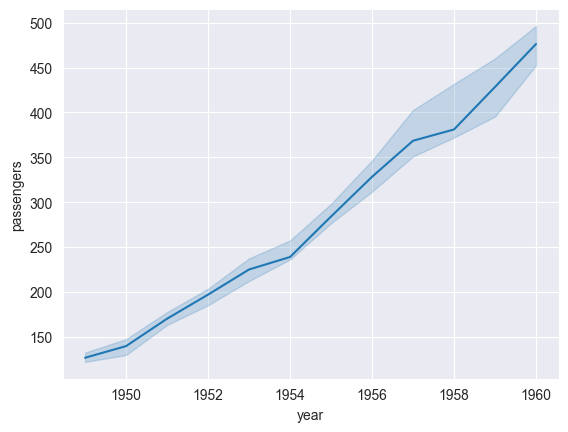

In [107]:
# Das Konfidenzintervall lässt sich über n_boot steuern
sns.lineplot(flights, x='year', y='passengers', n_boot=12);

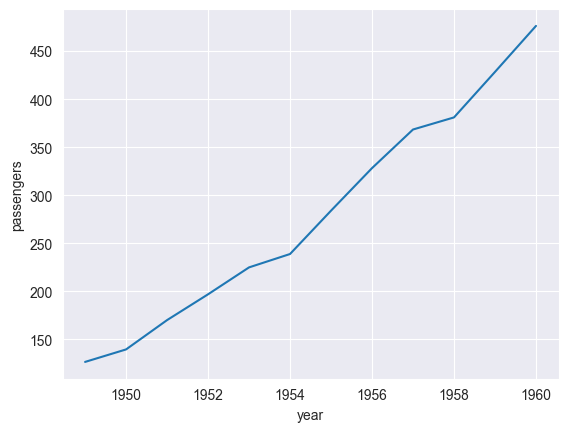

In [108]:
# Nur die Linie:
sns.lineplot(flights, x='year', y='passengers', errorbar=None);

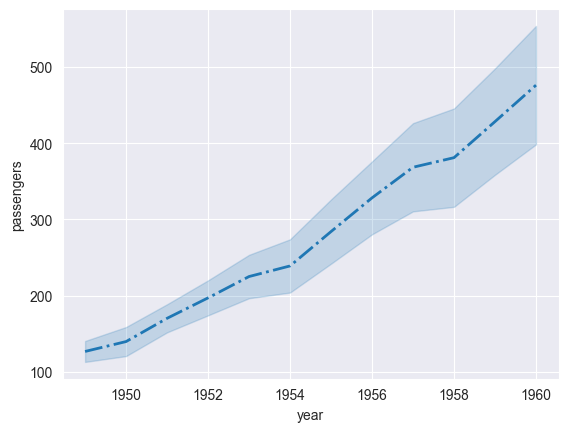

In [109]:
# Lineplot mit bearbeiteter Linie:
sns.lineplot(
	flights,
	x='year',
	y='passengers',
	lw=2,
	errorbar='sd',
	linestyle='dashdot'
);  # solid, dashed, dotted, dashdot

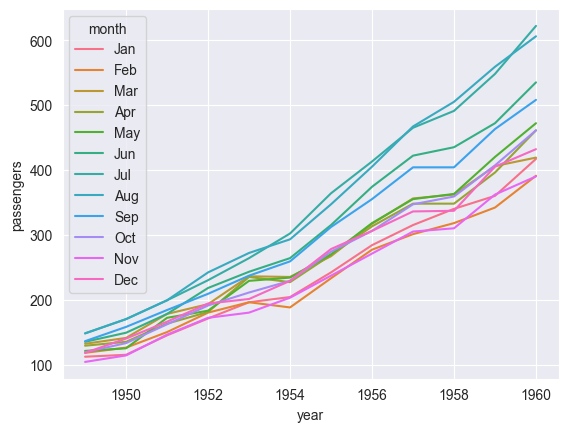

In [110]:
# Gruppierter Lineplot (zu viele Linien!):
sns.lineplot(flights,
			 x='year',
			 y='passengers',
			 hue='month');

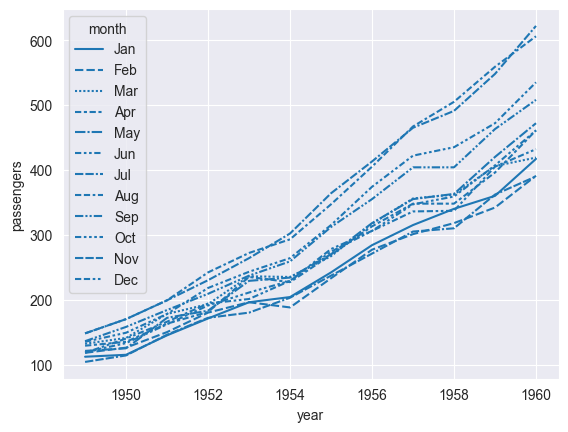

In [111]:
# Gruppierter Lineplot mit Style (ebenfalls unübersichtlich!):
sns.lineplot(
	flights,
	x='year',
	y='passengers',
	style='month'
);

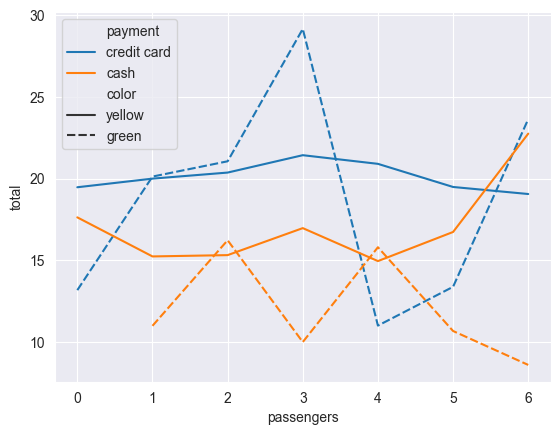

In [112]:
# Mit Hue und Style für zwei separate kategorische Gruppierungen verwenden
# Achtung: Keine Grafik, wie man sie produzieren sollte!
sns.lineplot(
	taxis,
	x='passengers',
	y='total',
	hue='payment',
	style='color',
	errorbar=None
);

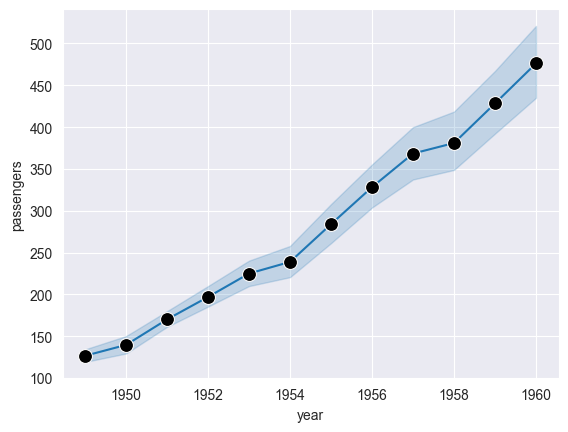

In [113]:
# Marker im Lineplot einsetzen:
sns.lineplot(
	flights,
	x='year',
	y='passengers',
	marker='o',
	markersize=10,
	markerfacecolor='black'
);

# o - Kreise
# s - Vierecke
# v - Dreieck
# > - Dreiecke
# + - Plus
# x - X
# diam - Diamanten

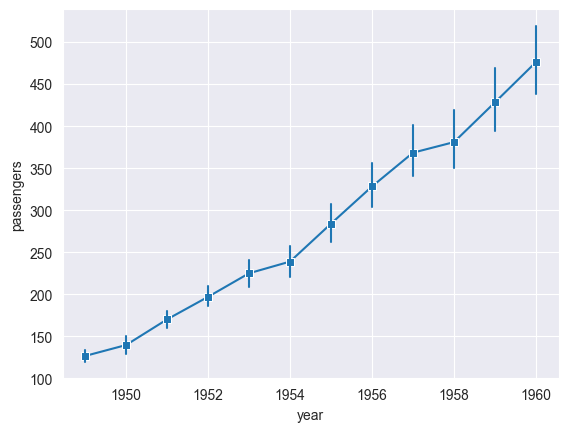

In [114]:
# Fehlerbalken und Marker
sns.lineplot(
	flights,
	x='year',
	y='passengers',
	err_style='bars',
	marker='s',
);

# 3. Scatterplot

---

Scatterplots sind gedacht, um den **Zusammenhang zwischen zwei metrischen Variablen** darzustellen.

Zusätzliche Style-Schlüsselwörter

* `size` / `s` | `markersize` / `ms`: Markierungsgröße (Scatterplot)

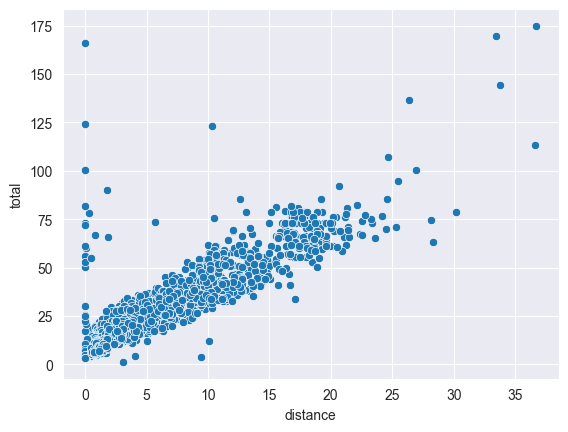

In [115]:
# Einfacher Scatterplot:
sns.scatterplot(taxis,
				x='distance',
				y='total');

## Weitere Dimensionen einbringen

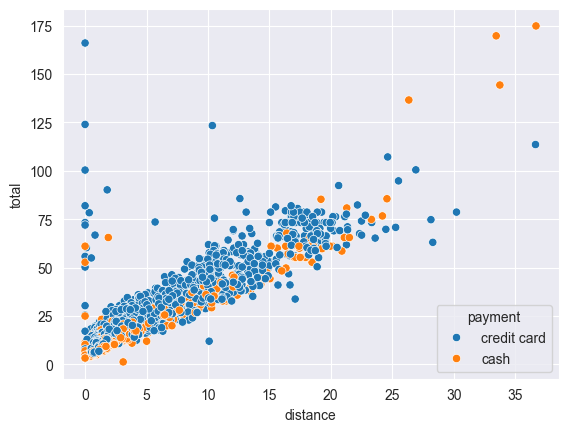

In [116]:
# Gruppierter Scatterplot
sns.scatterplot(
	taxis,
	x='distance',
	y='total',
	hue='payment',
);

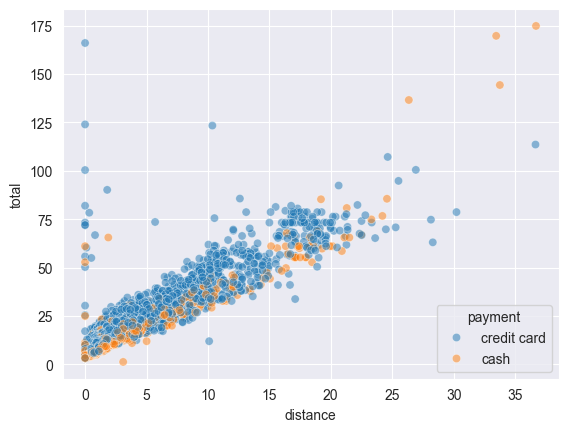

In [117]:
sns.scatterplot(
	taxis,
	x='distance',
	y='total',
	hue='payment',
	alpha=0.5
);

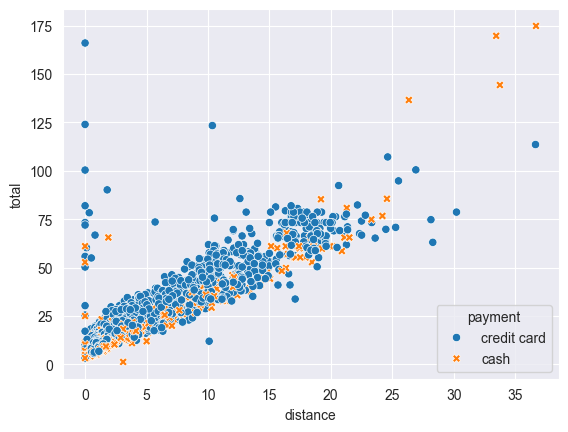

In [118]:
# Gruppierter Scatterplot mit Style
sns.scatterplot(
	taxis,
	x='distance',
	y='total',
	hue='payment',
	style='payment'
);

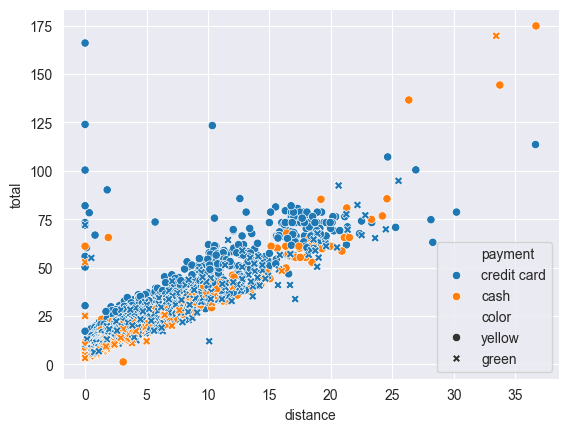

In [119]:
# Style und Hue mit kategorischen Infos:
sns.scatterplot(
	taxis,
	x='distance',
	y='total',
	hue='payment',
	style='color'
);

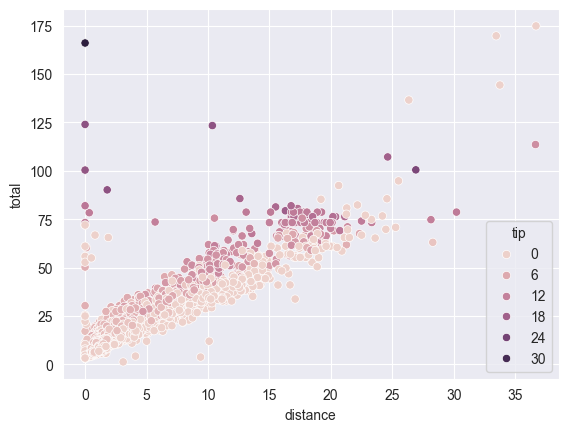

In [120]:
# Numeric Hue:
sns.scatterplot(
	taxis,
	x='distance',
	y='total',
	hue='tip'
);
# Quizfrage: Was macht dieser Numeric Hue hier eigentlich?
# ...

In [121]:
# Gibt es als Tip wirklich nur diese 6 Werte? Test:
taxis.tip.unique()

array([2.150e+00, 0.000e+00, 2.360e+00, 6.150e+00, 1.100e+00, 2.160e+00,
       2.000e+00, 1.000e+00, 1.920e+00, 1.080e+00, 1.540e+00, 2.300e+00,
       8.310e+00, 3.840e+00, 3.000e+00, 3.260e+00, 2.060e+00, 2.490e+00,
       4.260e+00, 2.760e+00, 6.060e+00, 2.008e+01, 3.150e+00, 2.640e+00,
       2.850e+00, 4.460e+00, 1.760e+00, 3.080e+00, 3.760e+00, 2.790e+00,
       1.500e+00, 2.960e+00, 1.950e+00, 1.650e+00, 1.800e+00, 2.250e+00,
       2.660e+00, 2.080e+00, 5.950e+00, 9.500e-01, 1.200e+00, 4.400e+00,
       2.550e+00, 5.000e-01, 3.360e+00, 2.860e+00, 1.470e+00, 4.650e+00,
       9.710e+00, 2.750e+00, 5.580e+00, 1.860e+00, 3.750e+00, 7.800e-01,
       3.050e+00, 1.620e+00, 2.700e+00, 1.150e+01, 3.660e+00, 2.940e+00,
       2.500e+00, 1.560e+00, 3.650e+00, 5.260e+00, 3.860e+00, 2.670e+00,
       2.260e+00, 3.700e+00, 7.460e+00, 2.450e+00, 1.460e+00, 6.000e-02,
       1.310e+01, 2.320e+00, 3.320e+00, 1.110e+00, 4.000e+00, 1.960e+00,
       2.000e-02, 6.000e+00, 3.160e+00, 2.350e+00, 

In [122]:
# So viele Werte gibt es wirklich:
len(taxis.tip.unique())

489

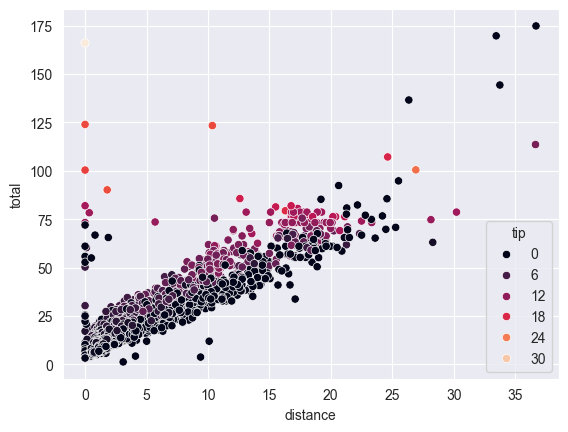

In [123]:
# Hue-Farbe ändern
# Farbpaletten: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.scatterplot(
	data=taxis,
	x='distance',
	y='total',
	hue='tip',
	palette='rocket'
);

In [ ]:
# Quizfrage: Was ist hier passiert?
# sns.scatterplot(data=taxis,
#                 x='distance',
#                 y='total',
#                 hue='tip',
#                 palette='deep');

# Auskommentiert aus Ladezeitgründen!

In [ ]:
# Notizen hier:

# Kategorische Farbpalette für sequentielle Daten
# Keine gute Idee!
# 1. Die Farbgebung der Grafik ist nicht interpretierbar
# 2. Die Legende explodiert, weil alle Einzelwerte als Kategorien verstanden werden
# 3. Die Farbpalette wiederholt sich immer wieder und ordnet damit verschiedenen Zahlenwerten dieselben Farbtöne zu!

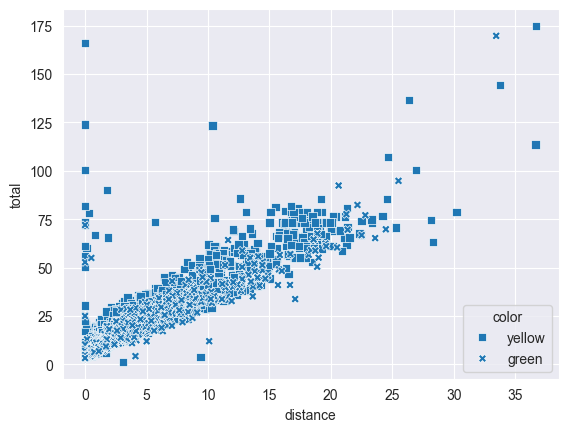

In [124]:
# Marker selbst kontrollieren
# Liste an Markern: https://matplotlib.org/stable/api/markers_api.html
markers = {'yellow': 's', 'green': 'X'}

sns.scatterplot(
	taxis,
	x='distance',
	y='total',
	style='color',
	markers=markers
);

## Achsen stilisieren

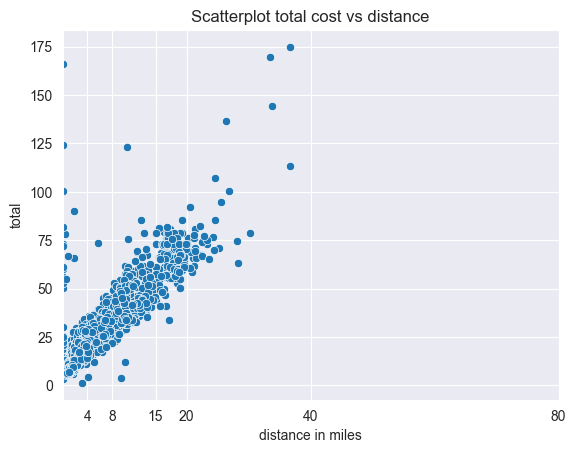

In [125]:
# Einfacher Scatterplot mit Label, Titel, Ticks...
ax = sns.scatterplot(taxis,
					 x='distance',
					 y='total')

ax.set(xlabel='distance in miles',
	   title='Scatterplot total cost vs distance',
	   xticks=[4, 8, 15, 20, 40, 80],
	   xlim=[0, 80]);

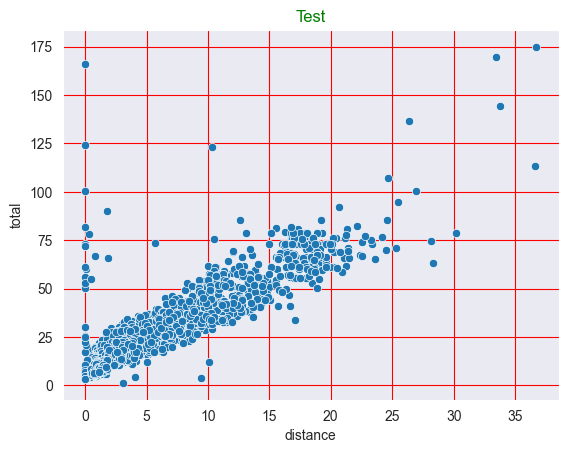

In [126]:
# Einfacher Scatterplot mit farbigem Gitter und farbiger Überschrift
# rc steht für runtime configuration und umfasst eine Reihe von Standard-Einstellungen
# für Plots, mit denen Matplotlib und damit auch Seaborn geladen wird.
# Durch Zugriff auf rc können diese Einstellungen geändert werden.
# Damit diese Veränderung nicht bei jedem weiteren Plot greifen, nutzen wir 'with':
with sns.axes_style(rc={'grid.color': 'red',
						'text.color': 'green'}):
	ax = sns.scatterplot(taxis, x='distance', y='total')
	ax.set(title='Test')

## Facettierung / Plotgitter

Um mehrere Plots in einem Gitter anzuordnen kann `relplot` verwendet werden. Relplot kann Line- und Scatterplots erzeugen.

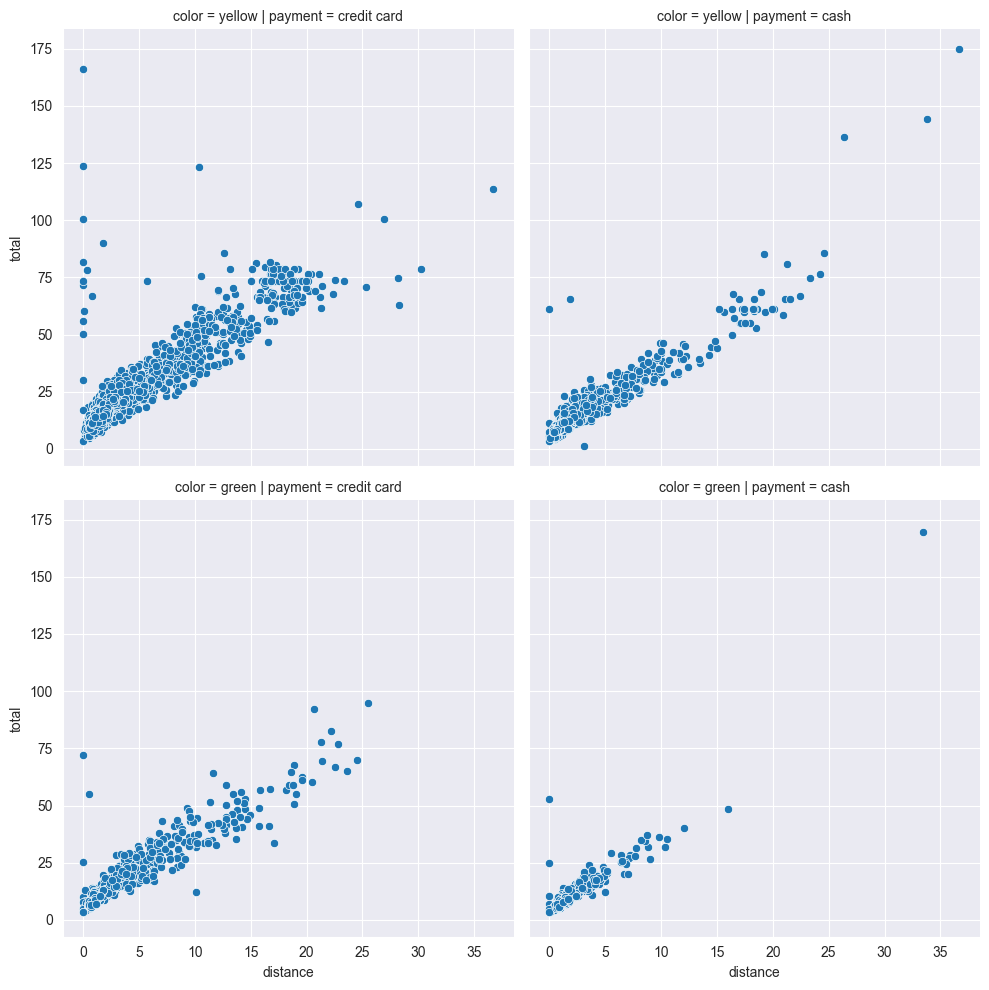

In [127]:
# FacetGrid / auftrennen in mehrere Plots
sns.relplot(
	taxis,
	x='distance',
	y='total',
	row='color',
	col='payment'
);

## Übungsaufgabe Scatterplot

Lade den `penguins` Datensatz und erstelle den gezeigten Scatterplot.

![2_penguins_plot.png](2_penguins_scatterplot.png)
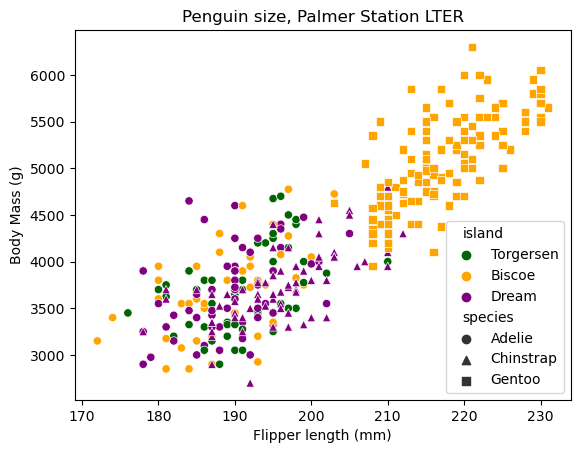

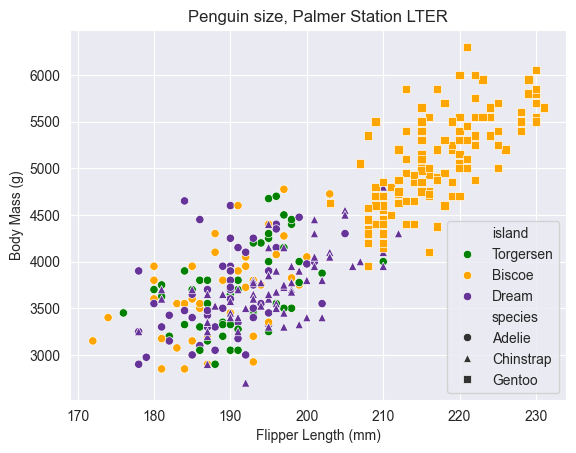

In [145]:
# markers
markers = {"Adelie": "o", "Chinstrap": "^", "Gentoo": "s"}

# scatter plot
pengu_plot2 = sns.scatterplot(
	penguins,
	x="flipper_length_mm",
	y="body_mass_g",
	hue="island",
	style="species",
	palette={'Dream': 'rebeccapurple', 'Torgersen': 'green', 'Biscoe': 'orange'},
	markers=markers
);

# labels, title
pengu_plot2.set(
	xlabel="Flipper Length (mm)",
	ylabel="Body Mass (g)",
	title="Penguin size, Palmer Station LTER"
);